In [1]:
#importing model building libraries
import os
os.chdir("C:/Users/BINNY/Desktop/InternshipProject")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [2]:
#Intialize the model
model=Sequential()

In [3]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [4]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
#Add Flattening Layer
model.add(Flatten())

In [6]:
#Add Hidden Layer
model.add(Dense(init="uniform",activation="relu",output_dim=120))

C:\Users\BINNY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="uniform")`
  


In [7]:
#Add Output layer
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

C:\Users\BINNY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [8]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
x_train = train_datagen.flow_from_directory('Dataset/train_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('Dataset/test_dataset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 160 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
print(x_train.class_indices)

{'lungcancer': 0, 'lungnoudle': 1}


In [12]:
x_train

In [13]:
x_test

In [14]:
history=model.fit_generator(x_train,
                         steps_per_epoch = 225,
                         epochs = 25,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/25
225/225 [==============================] - 63s 279ms/step - loss: 0.4685 - accuracy: 0.7661 - val_loss: 1.6506 - val_accuracy: 0.4492
Epoch 2/25
225/225 [==============================] - 59s 264ms/step - loss: 0.1438 - accuracy: 0.9492 - val_loss: 3.6081 - val_accuracy: 0.4707
Epoch 3/25
225/225 [==============================] - 59s 263ms/step - loss: 0.0356 - accuracy: 0.9926 - val_loss: 4.2725 - val_accuracy: 0.4458
Epoch 4/25
225/225 [==============================] - 57s 254ms/step - loss: 0.0216 - accuracy: 0.9962 - val_loss: 3.4377 - val_accuracy: 0.4337
Epoch 5/25
225/225 [==============================] - 58s 256ms/step - loss: 0.0125 - accuracy: 0.9976 - val_loss: 7.3203 - val_accuracy: 0.4593
Epoch 6/25
225/225 [==============================] - 63s 280ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 5.9296 - val_accuracy: 0.4611
Epoch 7/25
225/225 [==============================] - 61s 271ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 4.9686 - val_a

In [15]:
model.save("mymodel.h5")

C:\Users\BINNY\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


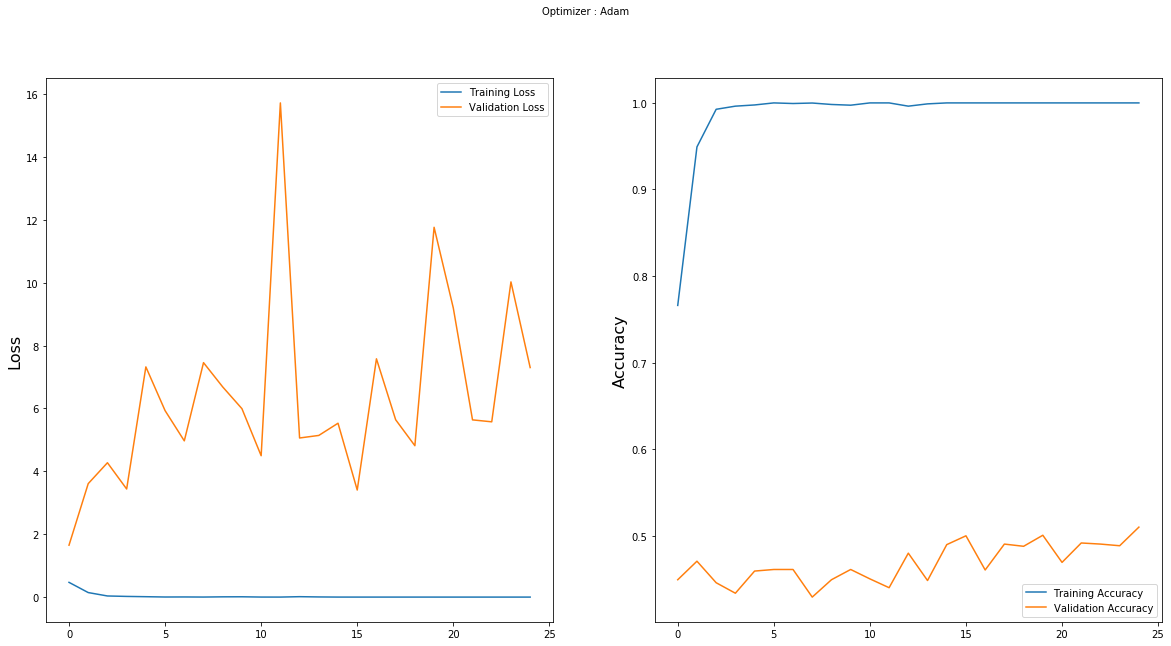

In [17]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='middle right')
plt.show()